# MOVIE ANALYSIS

The objective of this project is to perform a comprehensive analysis of movie data, encompassing thorough data cleaning and insightful visualizations using Seaborn and Matplotlib. The key goals include extracting meaningful insights about movie trends, director popularity, country-wise movie production, and genre preferences.

### Overview
This analysis focuses on a subset of Netflix's content catalog, including movies and TV shows. The dataset contains attributes such as show ID, type, title, director, country, date added, rating, duration, and listed_in (genres). We aim to explore the relationships between these attributes to gain insights into the content on Netflix. The dataset consists of 8,790 rows and 9 columns.

### Variables

Date Added: The date when the content was added to Netflix.
Rating: The content rating, such as TV-MA, PG-13, etc., which indicates the appropriate audience for the content.
Duration: The length of the movie in minutes or the number of seasons for TV shows.
Listed_in ( Genres): The genres under which the content is categorized, such as Dramas, Comedies, etc.

## DATA GATHERING 

First, let us begin by acquiring the necessary tools for our analysis and importing our dataset.

In [1]:
# Import necessary Libraries 
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load data 
data = pd.read_csv(r"C:\Users\USER\Downloads\capstone - capstone.csv")

# Creating a copy of the dataframe 
dt = data.copy()

#### I then proceed to familiarize myself with the data while keeping in mind the aim of my analysis(diving into the movie data to extract to extract meaningful insights about movie trends, director popularity, country-wise movie production, and genre preferences) During this process, we derive some interesting questions which could help do a proper exploratory data analysis

In [2]:
# Previewing the dataframe 
dt.head(15)

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,THE gREAT BrITisH bAKING sHOW,Andy Devonshire,UK,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,tHE STARLING,Theodore Melfi,United States,9/24/2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Mvie,MOTU paTLU IN ThE gAME Of ZOnES,Suhas Kadav,India,5/1/2021,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,jE SUIs kaRL,Christian Schwochow,Germany,9/23/2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,mOTU PAtlu IN WONDERLaND,Suhas Kadav,India,5/1/2021,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


## DATA QUALITY ASSESSMENT PROCESS : 

Data quality assessment is a crucial step in ensuring that our data is fit for use in our specific context

In this phase, we assess the structure and content of our data. We crosscheck for data quality and tidiness issues; beginning with inaccurate data types, missing/incomplete dad inconsistent characters, outliers and , duplicatdatand then diving into other problems thatch will be observed as we proceed.

In [3]:
# Getting the descriptive statistics of the data to see if they are any anomalies or patterns 
dt.describe()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,12,8787,4528,114,1714,23,250,515
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6110,2,2588,2920,110,3203,1788,362


### Cross checking the data for quality issue, beginning checking the datatype of each column

a. Checking for Incorrect Datatype

In [4]:
# Inspecting the information of the data 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


#### The data types seem appropriate for each column. Now we proceed to check for null values.

In [5]:
# Verify columns with null entries 
dt.isnull().sum()

show_id       0
Type          0
title         0
director      0
Country       0
date added    0
rating        0
duration      0
listed_in     0
dtype: int64

#### There are no null values in the columns, our data seems alright, i will proceed to check for duplicates 

In [6]:
# Check for duplicates across all columns
duplicate_rows = dt[dt.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [show_id, Type, title, director, Country, date added, rating, duration, listed_in]
Index: []


#### Result means that no rows were found to have duplicates across all columns. This indicates that there are no exact duplicates present in your DataFrame where all values across all columns match exactly with another row.

In [7]:
# Checking the column names 
dt.columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

#### Result shows the column names in the dataset are correct

In [8]:
# Checking the shape of the dataset 
dt.shape

(8790, 9)

In [9]:
# Checking the data size 
dt.size 

79110

#### Result shows that the entire dataset has 8790 rows and 9 columns, and the data size is 79110

In [10]:
# Function to check inconsistent characters in each column
def check_inconsistent_characters(column):
    inconsistent_characters = set()
    for value in column:
        if isinstance(value, str):  # Check if the value is a string
            for char in value:
                if not char.isalnum():  # Check if the character is not alphanumeric
                    inconsistent_characters.add(char)
    return inconsistent_characters

# Iterate over each column and check for inconsistent characters
inconsistent_characters_per_column = {}
for column in dt.columns:
    inconsistent_characters = check_inconsistent_characters(dt[column])
    inconsistent_characters_per_column[column] = inconsistent_characters

# Display the inconsistent characters found in each column
for column, chars in inconsistent_characters_per_column.items():
    print(f'Column "{column}": {chars}')

Column "show_id": set()
Column "Type": {' '}
Column "title": {'!', '=', '่', '_', '„', '’', '¡', '้', '-', '“', ' ', ',', '*', ')', ':', '̇', '.', '์', '‘', '(', '+', '&', '–', '%', '|', '?', '¿', '…', '@', '\u200b', '#', '\xa0', '~', '/', '”', '\n', "'"}
Column "director": {'!', ' ', ',', '&', '.', '’', "'", '-'}
Column "Country": {' '}
Column "date added": {'/', '(', ')'}
Column "rating": {'-'}
Column "duration": {' '}
Column "listed_in": {' ', ',', '&', "'", '-'}


#### The results highlight potential inconsistencies or irregularities in the data, which may require further cleaning or preprocessing before analysis.
##### show_id:
No inconsistent characters were found.

##### Type:
The only inconsistent character found is a space (' ').

##### title:
Various inconsistent characters were found, including special characters like '=', '|', '*', '#', and punctuation marks like '.', ',', '?', etc.

##### director: 
Inconsistent characters include punctuation marks like ',', '.', '-', and '&' as well as apostrophes and spaces.

##### Country:
The only inconsistent character found is a space (' ').

##### date added:
Inconsistent characters include '/', ')' and '('.

##### rating: 
The only inconsistent character found is a hyphen ('-').

##### duration: 
The only inconsistent character found is a space (' ').

##### listed_in:
Inconsistent characters include punctuation marks like ',', '-' and '&', as well as apostrophes and spaces.

In [11]:
# Function to check for odd entries in a column
def check_odd_entries(column):
    odd_entries = []
    for value in column:
        if isinstance(value, int):  # Check if the value is an integer
            if value % 2 != 0:  # Check if the value is odd
                odd_entries.append(value)
    return odd_entries

# Iterate over each column and check for odd entries
odd_entries_per_column = {}
for column in dt.columns:
    odd_entries = check_odd_entries(dt[column])
    odd_entries_per_column[column] = odd_entries

# Display the odd entries found in each column
for column, entries in odd_entries_per_column.items():
    print(f'Column "{column}": {entries}')

Column "show_id": []
Column "Type": []
Column "title": []
Column "director": []
Column "Country": []
Column "date added": []
Column "rating": []
Column "duration": []
Column "listed_in": []


#### Result shows that there are no odd integer values present in any of the columns in the DataFrame.

## DATA CLEANING PROCESS : 
In this section of our analysis, we will address the various data quality issues identified, and clean our data to be ready for exploratory analysis and visualization

#### 1. Addressing the date column and converting to the correct datatime

In [12]:
# Convert 'date added' column to string type before using .str accessor
dt['date added'] = dt['date added'].astype(str)

# Remove parentheses from 'date added' column
dt['date added'] = dt['date added'].str.replace(r'[\(\)]', '', regex=True)

# Convert 'date added' column to datetime
dt['date added'] = pd.to_datetime(dt['date added'])

In [13]:
# Verifying that the date added column has been converted to the correct date format
dt.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### 2. Addressing the Country and Title Column with Abbreviated names have the correct names 
e.g US - United states, UK - United Kingdom

In [14]:
# Ensure the 'Country' column has the correct country name using the replace function
dt['Country'] = dt['Country'].replace({'UK': 'United Kingdom', 'US': 'United States', 'Us': 'United States', 'PK': 'Pakistan', 
                                           'HK': 'Hong Kong', 'ID': 'Indonesia', 'ITL': 'Italy', 'nited States': 'United States'})

In [15]:
# I observed abbreviated names in the Type Column

#Ensure the 'Type' column has the correct Type name using the replace function
dt['Type'] = dt['Type'].replace({'m': 'Movie', 'Mv': 'Movie', 'Mve': 'Movie', 'Mvi': 'Movie', 'Mvie': 'Movie',
                                 'TV': 'TV Show','TVS' : 'TV Show','MvE' : 'Movie','tv' : 'TV Show','M' : 'Movie' })

In [16]:
dt.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### 3. Addressing the Title Column with the wrong case to have a proper case to improve the data's readability and ensure the ratings column has replaced the correct rating names.

In [17]:
# standardize the title column to have proper case
stopwords = ['is', 'a', 'an', 'the', 'and', 'or', 'but']
dt['title'] = dt['title'].apply(lambda x: ' '.join(word if word in stopwords else word.capitalize() for word in x.split()))

In [18]:
#Ensure the 'Rating' column has the correct Rating name using the replace function
dt['rating'] = dt['rating'].replace({'r': 'R', 'tv14': 'TV14', 'TVPg': 'TVPG', 'tvma': 'TVMA', 'pg': 'PG',
                                 'nr': 'NR','tvy' : 'TVY','tvpg' : 'TVPG' })

In [19]:
dt.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### 4. Addressing inconsistent characters in the columns 

In [20]:
# Function to clean inconsistent characters in a column
def clean_inconsistent_characters(column):
    cleaned_column = []
    for value in column:
        if isinstance(value, str):  # Check if the value is a string
            cleaned_value = ''.join(char for char in value if char.isalnum() or char.isspace())  # Keep alphanumeric characters and spaces
            cleaned_column.append(cleaned_value.strip())  # Strip leading and trailing whitespace
        else:
            cleaned_column.append(value)  # Keep non-string values as they are
    return cleaned_column

# Clean inconsistent characters in each column
for column in dt.columns:
    dt[column] = clean_inconsistent_characters(dt[column])

# Display the cleaned DataFrame
print(dt)

     show_id     Type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

            Country date added rating   duration  \
0     United States 2021-09-25   PG

In [21]:
# Cross Checking that all inconsistent character has been cleaned 

# Function to check for inconsistent characters in a column
def check_inconsistent_characters(column):
    inconsistent_characters = set()
    for value in column:
        if isinstance(value, str):  # Check if the value is a string
            for char in value:
                if not char.isalnum() and not char.isspace():  # Check if the character is not alphanumeric or a space
                    inconsistent_characters.add(char)
    return inconsistent_characters

# Iterate over each column and check for inconsistent characters
inconsistent_characters_per_column = {}
for column in dt.columns:
    inconsistent_characters = check_inconsistent_characters(dt[column])
    inconsistent_characters_per_column[column] = inconsistent_characters

# Display the inconsistent characters found in each column
for column, chars in inconsistent_characters_per_column.items():
    print(f'Column "{column}": {chars}')

Column "show_id": set()
Column "Type": set()
Column "title": set()
Column "director": set()
Column "Country": set()
Column "date added": set()
Column "rating": set()
Column "duration": set()
Column "listed_in": set()


##### The result indicates that there are no inconsistent characters found in any of the columns in the DataFrame.

#### 5.  Filtering the director column with the director name 'Not Given' for the movie title and knowing the count to address it either to replace or drop the columns with correct directory names. Also the Country column with the Country name 'Not Given' to the correct with country where the movie was shot or not 

In [22]:
# Filter rows where the director is "Not Given"
not_given_directors_dt = dt[dt['director'] == 'Not Given']

# Display the title and director columns where director is "Not Given"
result = not_given_directors_dt[['title', 'director']]
print(result)

                               title   director
12                    99 Songs tamil  Not Given
17             Jailbirds New Orleans  Not Given
18    Crime Stories India Detectives  Not Given
33                            Jaguar  Not Given
34                Chicago Party Aunt  Not Given
...                              ...        ...
8785                      Yunus Emre  Not Given
8786                       Zak Storm  Not Given
8787              Zindagi Gulzar Hai  Not Given
8788                            Yoko  Not Given
8789                             Yom  Not Given

[2588 rows x 2 columns]


In [23]:
# Filter rows where the Country is "Not Given"
not_given_directors_dt = dt[dt['Country'] == 'Not Given']

# Display the title and Country columns where Country is "Not Given"
result = not_given_directors_dt[['title', 'Country']]
print(result)

                                                  title    Country
23                      My Little Pony A New Generation  Not Given
24                                     Bangkok Breaking  Not Given
25    Europes Most Dangerous Man Otto Skorzeny In Spain  Not Given
26                                      Samudri Lootere  Not Given
52                                            Intrusion  Not Given
...                                                 ...        ...
6005             Teenage Mutant Ninja Turtles the Movie  Not Given
6257                                    The Perfect Day  Not Given
6366                       Tom And Jerry The Magic Ring  Not Given
6468                              Westside Vs The World  Not Given
6499                              Worlds Weirdest Homes  Not Given

[287 rows x 2 columns]


##### The results show that the 'Director' column has approximately 2,588 instances labeled as 'Not Given,' whereas the 'Country' column has around 287 such instances. These entries could affect the accuracy of our analysis, particularly in visualization. Therefore, the best course of action is to remove the 'Director' column, which has a higher count of 'Not Given' entries, and retain the 'Country' column for consideration.

#### 6. Addressing the column that needs to be removed 'director' Column

In [25]:
# Remove the 'Director' columns
dt = dt.drop(columns=[ 'director'])

In [26]:
# Display the first 50 rows of the DataFrame with all columns
print(dt.iloc[:50, :])

   show_id     Type                                              title  \
0       s1    Movie                               Dick Johnson Is Dead   
1       s3  TV Show                                          Ganglands   
2       s6  TV Show                                      Midnight Mass   
3      s14    Movie                   Confessions Of An Invisible Girl   
4       s8    Movie                                            Sankofa   
5       s9  TV Show                      The Great British Baking Show   
6      s10    Movie                                       The Starling   
7     s939    Movie                    Motu Patlu In The Game Of Zones   
8      s13    Movie                                       Je Suis Karl   
9     s940    Movie                           Motu Patlu In Wonderland   
10    s941    Movie                      Motu Patlu Deep Sea Adventure   
11    s942    Movie                            Motu Patlu Mission Moon   
12    s852    Movie                   

In [27]:
# Cross-Checking my columns to check the changes made  
dt.columns

Index(['show_id', 'Type', 'title', 'Country', 'date added', 'rating',
       'duration', 'listed_in'],
      dtype='object')

In [28]:
# Cross Checking there are no nulls or Nan Values in the updated cleaned dataset
dt.isna().sum()

show_id       0
Type          0
title         0
Country       0
date added    0
rating        0
duration      0
listed_in     0
dtype: int64

##### The result shows that the director column has been removed successfully, i double checked the quality of the data to be sure it is ready for my exploratory data analysis and visualization 

#### 7. Addressing incorrect values in the Listed in Column which is '1' annd '3' and replacing with the correct values 

In [29]:
# Ensure the 'listed in' column has the correct list name using the replace function
dt['listed_in'] = dt['listed_in'].replace({'1': 'TV Dramas, TV Action, TV Thrillers', '3': 'Romantic Movie, Fantasy'})

In [30]:
# Check if '1' or '3' is present in the 'listed_in' column
is_present = dt['listed_in'].str.contains('1|3', regex=True)

# Print the rows where '1' or '3' is present in the 'listed_in' column
print(dt[is_present])

Empty DataFrame
Columns: [show_id, Type, title, Country, date added, rating, duration, listed_in]
Index: []


In [31]:
# Display rows 6451 to 7788 of the DataFrame to confirm the values in listed in 1 and 3 has been corrected
print(dt.iloc[6450:7788])

     show_id     Type                     title         Country date added  \
6450   s8693    Movie              Walk With Me              uk 2017-12-26   
6451   s8694    Movie               Walking Out   United States 2019-10-01   
6452   s8695    Movie                       War   United States 2019-04-01   
6453   s8696    Movie         War Chhod Na Yaar           India 2019-03-02   
6454   s8697    Movie                 War Horse   United States 2019-05-06   
...      ...      ...                       ...             ...        ...   
7783   s4126  TV Show  The Last Of The Schmucks           Egypt 2019-02-07   
7784   s4127  TV Show             Hidden Worlds           Egypt 2019-02-05   
7785   s4128  TV Show                      Live     South Korea 2019-02-05   
7786   s4130  TV Show                      Safe  United Kingdom 2019-02-05   
7787   s4131  TV Show                     Tayee           Egypt 2019-02-05   

     rating  duration                                          

##### Result shows that the value in the listed_in Column which were 1 and 3 has been corrected and the correct values has been replaced 

### Feature Engineering: 

##### Lastly, Create the year added and  year month Column before we start our Exploratory Data Analysis and derive the necessary insights and results for our analysis

##### * Extract year and year-month from the 'date added' column:


In [32]:
# Extract year and year-month from the date added column into new columns and calculate days since added into another column 
dt['year added'] = dt['date added'].dt.year
dt['year_month_added'] = dt['date added'].dt.to_period('M')

##### * Calculate the number of days since the content was added:

In [33]:
# Calculate the number of days since the movie was added
dt['days_since_added'] = (datetime.now() - dt['date added']).dt.days

In [34]:
dt.head()

,show_id,Type,title,Country,date added,rating,duration,listed_in,year added,year_month_added,days_since_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,PG13,90 min,Documentaries,2021,2021-09,986
1,s3,TV Show,Ganglands,France,2021-09-24,TVMA,1 Season,Crime TV Shows International TV Shows TV Actio...,2021,2021-09,987
2,s6,TV Show,Midnight Mass,United States,2021-09-24,TVMA,1 Season,TV Dramas TV Horror TV Mysteries,2021,2021-09,987
3,s14,Movie,Confessions Of An Invisible Girl,Brazil,2021-09-22,TVPG,91 min,Children Family Movies Comedies,2021,2021-09,989
4,s8,Movie,Sankofa,United States,2021-09-24,TVMA,125 min,Dramas Independent Movies International Movies,2021,2021-09,987


In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   Type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   Country           8790 non-null   object        
 4   date added        8790 non-null   datetime64[ns]
 5   rating            8790 non-null   object        
 6   duration          8790 non-null   object        
 7   listed_in         8790 non-null   object        
 8   year added        8790 non-null   int32         
 9   year_month_added  8790 non-null   period[M]     
 10  days_since_added  8790 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7), period[M](1)
memory usage: 721.2+ KB


In [36]:
dt.isnull().sum()

show_id             0
Type                0
title               0
Country             0
date added          0
rating              0
duration            0
listed_in           0
year added          0
year_month_added    0
days_since_added    0
dtype: int64

In [37]:
dt.isna().sum()

show_id             0
Type                0
title               0
Country             0
date added          0
rating              0
duration            0
listed_in           0
year added          0
year_month_added    0
days_since_added    0
dtype: int64

In [38]:
# Saving the cleaned dataset and renaming as a separate dataset
dt.to_csv("MovieData.csv")

##### Our Data is thoroughly cleaned and now ready for EDA and Visualization 

## Answer Specific Questions for My Analysis

In [2]:
# Import necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean data 
cleaned_data = pd.read_csv("MovieData.csv")

In [3]:
cleaned_data.head()

,Unnamed: 0,show_id,Type,title,Country,date added,rating,duration,listed_in,year added,year_month_added,days_since_added
0,0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,PG13,90 min,Documentaries,2021,2021-09,986
1,1,s3,TV Show,Ganglands,France,2021-09-24,TVMA,1 Season,Crime TV Shows International TV Shows TV Actio...,2021,2021-09,987
2,2,s6,TV Show,Midnight Mass,United States,2021-09-24,TVMA,1 Season,TV Dramas TV Horror TV Mysteries,2021,2021-09,987
3,3,s14,Movie,Confessions Of An Invisible Girl,Brazil,2021-09-22,TVPG,91 min,Children Family Movies Comedies,2021,2021-09,989
4,4,s8,Movie,Sankofa,United States,2021-09-24,TVMA,125 min,Dramas Independent Movies International Movies,2021,2021-09,987


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8790 non-null   int64 
 1   show_id           8790 non-null   object
 2   Type              8790 non-null   object
 3   title             8790 non-null   object
 4   Country           8790 non-null   object
 5   date added        8790 non-null   object
 6   rating            8790 non-null   object
 7   duration          8790 non-null   object
 8   listed_in         8790 non-null   object
 9   year added        8790 non-null   int64 
 10  year_month_added  8790 non-null   object
 11  days_since_added  8790 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 824.2+ KB


In [5]:
cleaned_data.isnull().sum()

Unnamed: 0          0
show_id             0
Type                0
title               0
Country             0
date added          0
rating              0
duration            0
listed_in           0
year added          0
year_month_added    0
days_since_added    0
dtype: int64

### 1.  Countries that make the most and least movies:

In [6]:
# Count the occurrences of each country
country_count = cleaned_data['Country'].str.split(',', expand=True).stack().value_counts()

# Top 5 and bottom 5 countries
top_5_countries = country_count.head(5)
bottom_5_countries = country_count.tail(5)
print('Top 5 countries:\n', top_5_countries)
print('Bottom 5 countries:\n', bottom_5_countries)

Top 5 countries:
 United States     2954
India             1047
United Kingdom     622
Pakistan           420
Not Given          287
Name: count, dtype: int64
Bottom 5 countries:
 Zimbabwe        1
Paraguay        1
Iran            1
West Germany    1
Slovenia        1
Name: count, dtype: int64


### 2. Most popular country-genre mix:

In [7]:
# Split genres and count occurrences for each country
country_genre = cleaned_data[['Country', 'listed_in']].dropna()
country_genre['Country'] = country_genre['Country'].str.split(',')
country_genre['listed_in'] = country_genre['listed_in'].str.split(',')
country_genre = country_genre.explode('Country').explode('listed_in')
country_genre_mix = country_genre.groupby(['Country', 'listed_in']).size().reset_index(name='count')

# Most popular country-genre mix
most_popular_country_genre = country_genre_mix.loc[country_genre_mix['count'].idxmax()]
print('Most popular country-genre mix:', most_popular_country_genre)


Most popular country-genre mix: Country      United States
listed_in    Documentaries
count                  230
Name: 1869, dtype: object


### 3. Countries with the highest average movie duration:

In [8]:
# Filter only movies
movies = cleaned_data[cleaned_data['Type'] == 'Movie'].copy()

# Extract numeric part from 'duration' and convert to integers
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Group by country and calculate average duration
avg_duration_by_country = movies.groupby('Country')['duration'].mean().sort_values(ascending=False)

# Display the top countries
avg_duration_by_country.head()

Country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           125.057911
Name: duration, dtype: float64

### 4.  Movie trends over the years:

In [9]:
# Count movies released each year
import pandas as pd 

movies_per_year = cleaned_data['year added'].value_counts().sort_index()
movies_per_year

year added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

# EXPLORATORY DATA ANALYSIS 
After the specific question is answered for my analysis, the following are the insights we want to derive from this data

### 1. Movie Trend Over the Years:

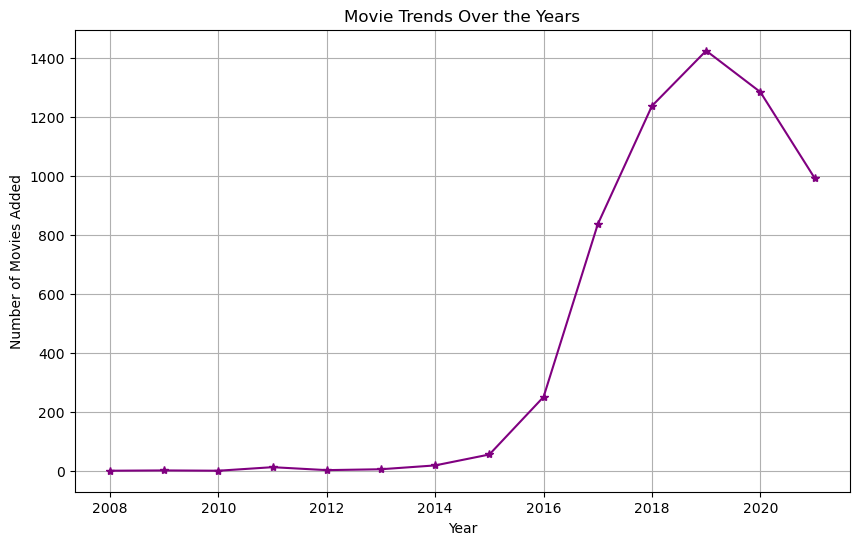

In [10]:
# Group by year and count the number of movies added each year
movie_trends = cleaned_data[cleaned_data['Type'] == 'Movie'].groupby('year added').size()

# Plot the trend of movie additions over the years
plt.figure(figsize=(10, 6))
movie_trends.plot(kind='line', marker='*', color='purple')
plt.title('Movie Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.grid(True)
plt.show()

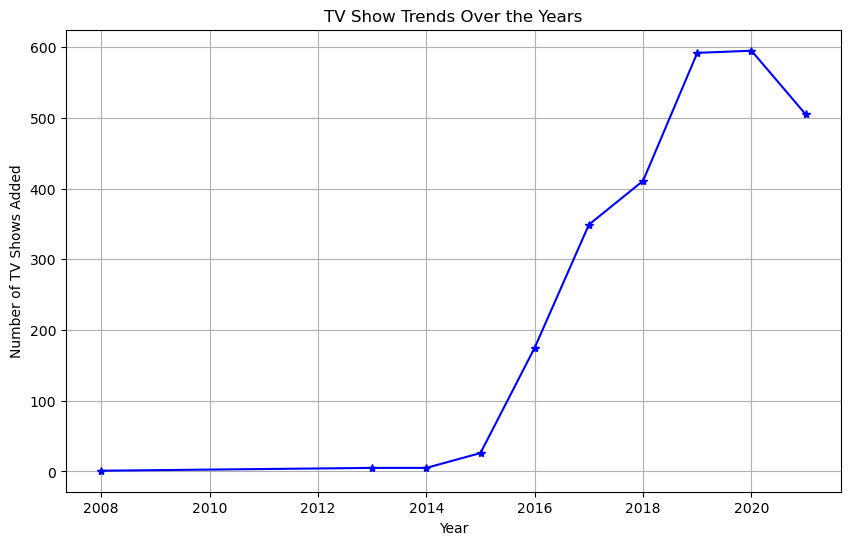

In [11]:
# Group by year and count the number of TV Shows added each year
movie_trends = cleaned_data[cleaned_data['Type'] == 'TV Show'].groupby('year added').size()

# Plot the trend of Tv show additions over the years
plt.figure(figsize=(10, 6))
movie_trends.plot(kind='line', marker='*', color='blue')
plt.title('TV Show Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Added')
plt.grid(True)
plt.show()

#### RESULT: The trend shows that the number of movies and TV Shows added to Netflix has been up and down since 2008. However, there was a noticeable increase starting in 2016, reaching its peak in 2019, and then dropping again after 2020. This suggests changes in how Netflix adds movies and TV shows over time, possibly based on what viewers want to watch or market dynamics.

### 2. Top 5 countries producing movies:

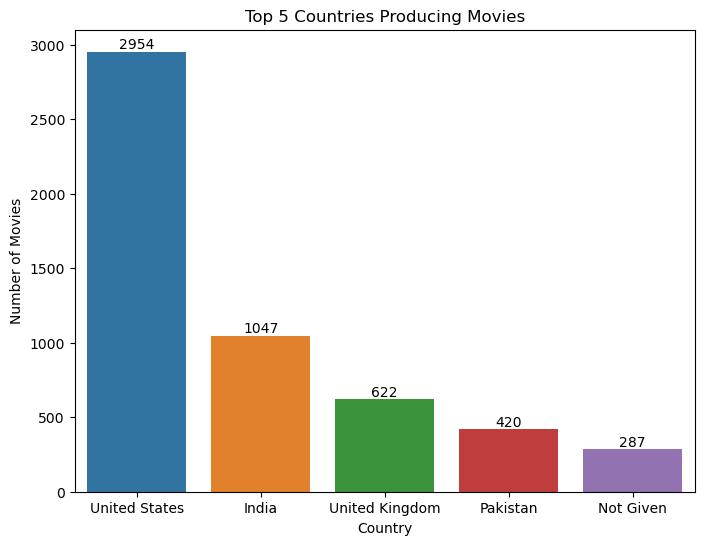

United States     2954
India             1047
United Kingdom     622
Pakistan           420
Not Given          287
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plt.title('Top 5 Countries Producing Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')

# Annotate the bars with the values
for i in ax.containers:
    ax.bar_label(i)

plt.show()

print(top_5_countries.head(5))

### 3. Distribution of Movie and TV Show Types

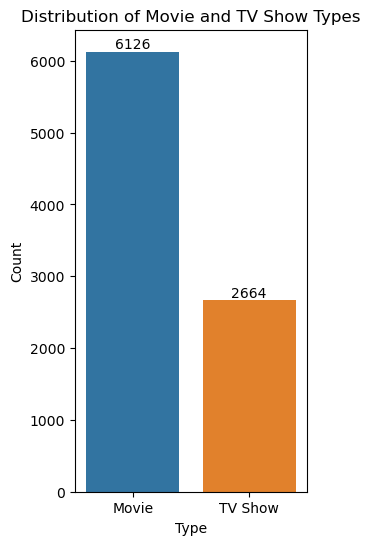

In [13]:
# Plot the distribution of 'Type'
plt.figure(figsize=(3, 6))
ax = sns.countplot(data=cleaned_data, x='Type')
plt.title('Distribution of Movie and TV Show Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Annotate the bars with the counts
for i in ax.containers:
    ax.bar_label(i)

plt.show()

#### CODE: This code creates a bar plot showing the count of movies and TV shows in the dataset. It provides a visual representation of the proportion of each type, highlighting the content strategy of Netflix.

#### RESULT: The resulting bar plot shows that movies have the highest count compared to TV shows in the dataset. This indicates that Netflix's catalog is more heavily weighted towards movies.

### 4. Distribution of Ratings:

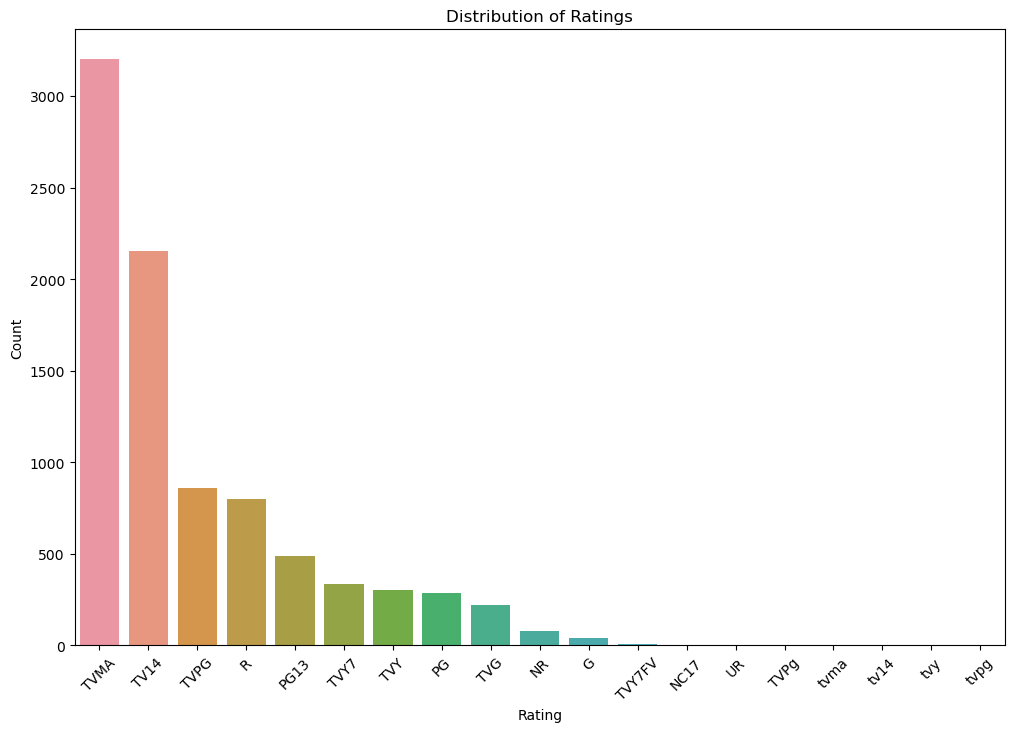

In [14]:
# Plotting the distribution of ratings
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, x='rating', order=cleaned_data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Addressing the issue to make our visualization more readable from our barchart displaying the ratings 

In [15]:
# Remove leading/trailing whitespace
cleaned_data['rating'] = cleaned_data['rating'].str.strip()

# Fill missing values with a placeholder ('UNKNOWN')
cleaned_data['rating'].fillna('UNKNOWN', inplace=True)

# Capitalize the 'rating' column to uppercase
cleaned_data['rating'] = cleaned_data['rating'].str.upper()

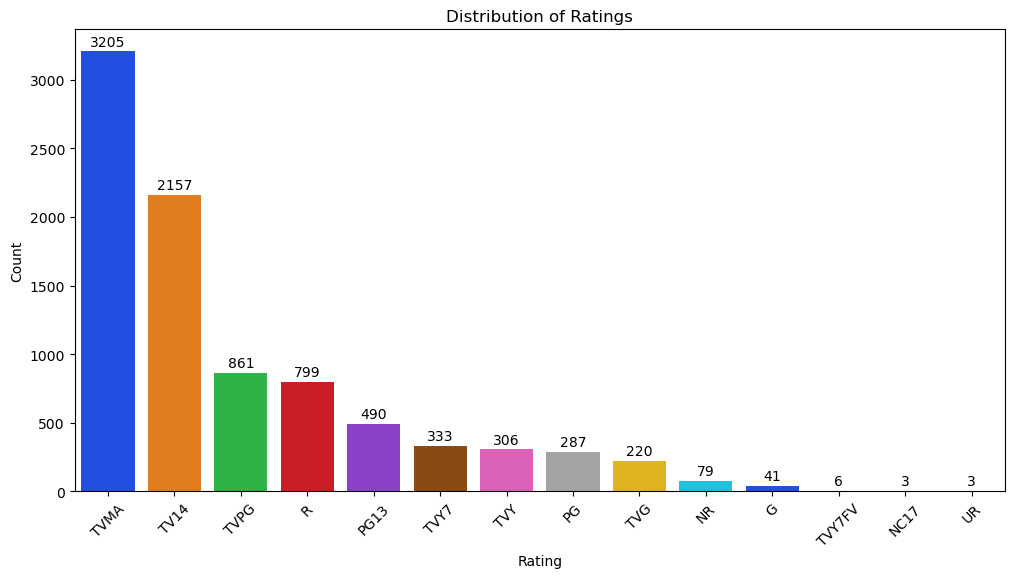

In [16]:
# Plotting the distribution of ratings 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=cleaned_data['rating'].value_counts().index, 
                 y=cleaned_data['rating'].value_counts().values, 
                 palette='bright')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 7), 
                textcoords = 'offset points')

plt.show()

#### CODE: This bar plot visualizes the distribution of different ratings in the dataset. It helps identify the dominant rating categories, which reflect the target demographics and content preferences.

#### RESULT: The result illustrates the distribution of ratings for movies in the dataset. TV-MA stands out as the most frequent rating, suggesting a preference for "mature content among viewers."


### 5. Most Common Movie Titles:

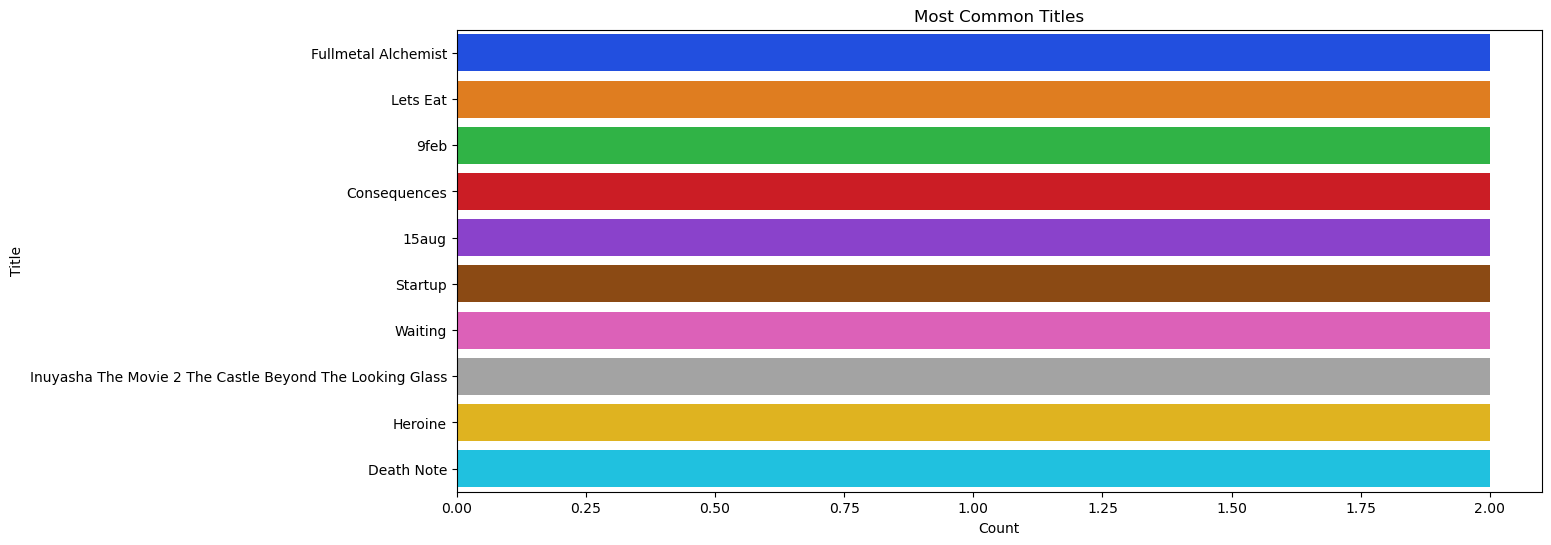

In [17]:
# Title column in my cleaned_data DataFrame
title_counts = cleaned_data['title'].value_counts().head(10)

# Plotting the most common titles
plt.figure(figsize=(14, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette="bright")
plt.title('Most Common Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()


#### RESULT: The result shows the TOP 10 Movie Titles
Understanding the most common titles can provide insights into the popular content among Netflix users. This helps identify trends, and preferences, and potentially inform decisions regarding content acquisition and production.

### 6. Most Common Movie Category: 

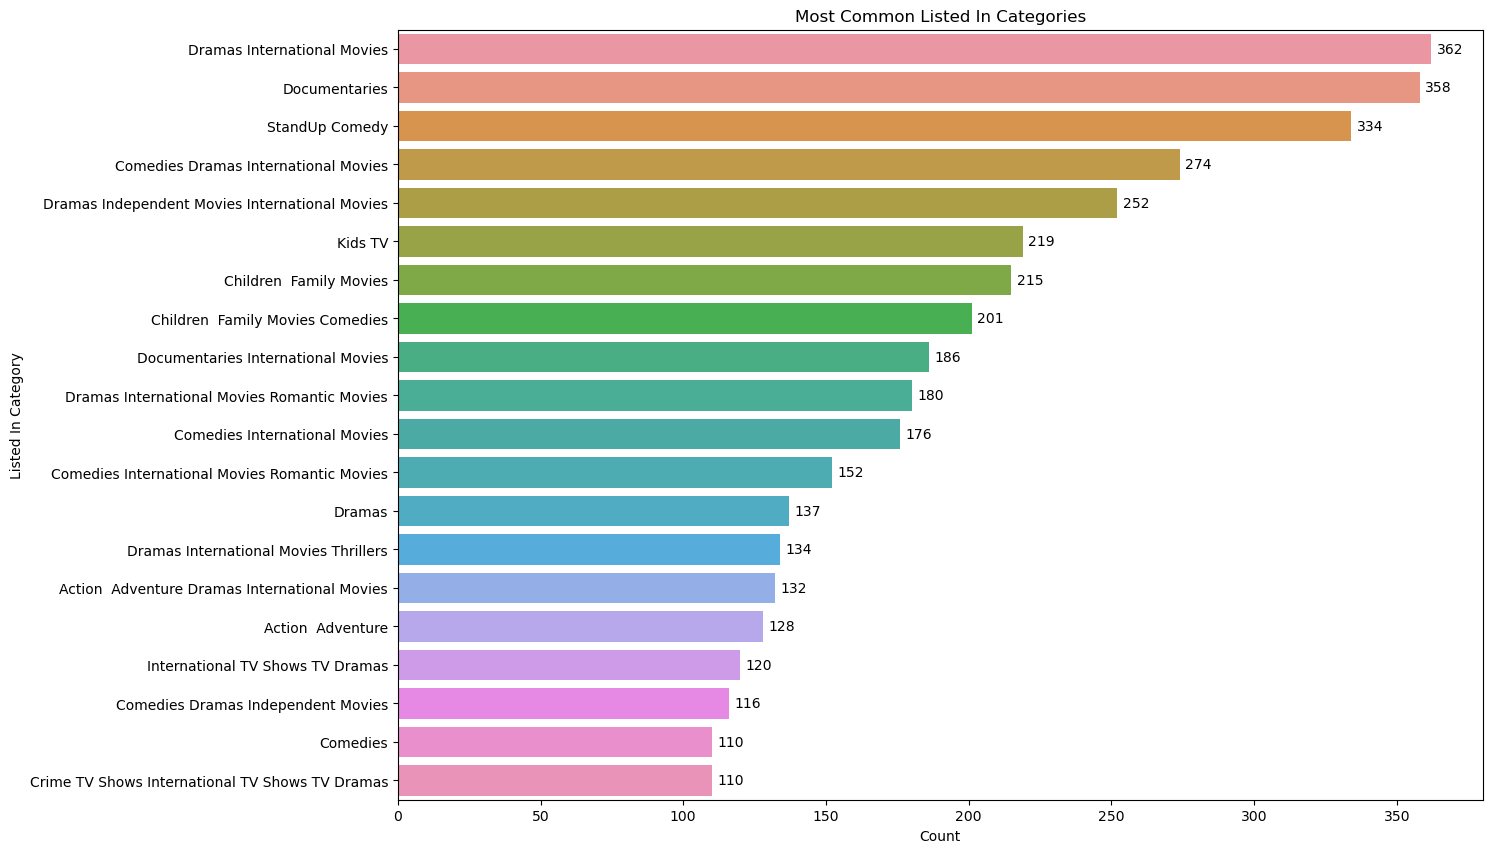

In [18]:
# Getting the top 20 most common listed_in categories
listedin_counts = cleaned_data['listed_in'].value_counts().head(20)

# Plotting the distribution of Listed In categories
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=listedin_counts.values, y=listedin_counts.index)
plt.title('Most Common Listed In Categories')
plt.xlabel('Count')
plt.ylabel('Listed In Category')

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(4, 0),  # Adjust the horizontal offset
                textcoords='offset points')

plt.show()

#### RESULT: The result shows the Top 20 movie category 
Analyzing the most common "listed in" categories can reveal the dominant genres or themes within the Netflix dataset. This information is valuable for us to understand the diversity of content available and tailor recommendations to match users' interests effectively.

### 7. Trend of Content Added Over Time:

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


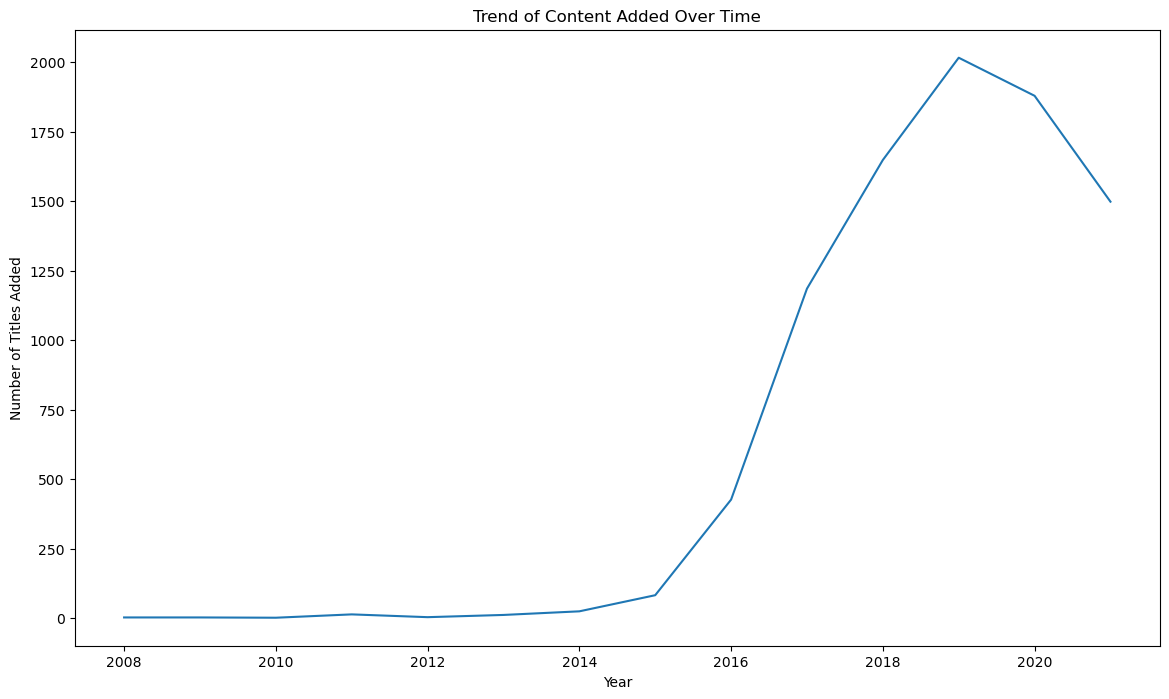

In [19]:
# Plotting the trend of content added over time
plt.figure(figsize=(14, 8))
content_added_trend = cleaned_data.groupby('year added').size()
sns.lineplot(x=content_added_trend.index, y=content_added_trend.values)
plt.title('Trend of Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


#### Result: The line plot shows how the number of titles added to Netflix has changed over the years. It reveals trends and patterns in content acquisition, indicating shifts in Netflix's content strategy over time.

## CORRELATION ANALYSIS 
The objective of this analysis is to investigate whether there exists any correlation between the date when content was added to Netflix and the assigned rating. Understanding such correlations can provide insights into Netflix's content strategy and viewer preferences.


In [24]:
# Convert the 'date_added' column to datetime objects and then to ordinal
cleaned_data['date_added'] = pd.to_datetime(cleaned_data['date added'])
cleaned_data['date_added_ordinal'] = cleaned_data['date_added'].apply(lambda x: x.toordinal())

# Map ratings to numerical values for correlation analysis
rating_mapping = {
    'TVY7': 1, 'TVY': 2, 'TVG': 3, 'TVPG': 4, 'PG': 5, 'PG13': 6,
    'TV14': 7, 'R': 8, 'TVMA': 9, 'NR': 10, 'UR': 11
}
cleaned_data['rating_numeric'] = cleaned_data['rating'].map(rating_mapping)

# Calculate correlation
correlation = cleaned_data[['date_added_ordinal', 'rating_numeric']].corr()
print('Correlation between release date and rating:\n', correlation)


Correlation between release date and rating:
                     date_added_ordinal  rating_numeric
date_added_ordinal            1.000000       -0.029293
rating_numeric               -0.029293        1.000000


### Methodology:
To conduct the analysis, the following steps were performed:

### Data Preparation:

The dataset containing information about Netflix content was obtained.
The 'date_added' column, representing the date content was added, was converted into datetime objects.
The 'date_added' column was further transformed into ordinal values to facilitate correlation analysis.

### Rating Mapping:
The categorical ratings were mapped to numerical values using a predefined mapping for correlation analysis.

### Correlation Analysis:
The correlation coefficient between the ordinal representation of the 'date_added' and the numeric representation of the ratings was calculated.
A correlation matrix was generated to indicate the strength and direction of the linear relationship between these two variables.
Results:
The correlation coefficient between the 'date_added_ordinal' and 'rating_numeric' variables was approximately -0.03. This value indicates a weak negative correlation, suggesting that there is no significant linear relationship between the date when content was added to Netflix and its assigned rating.

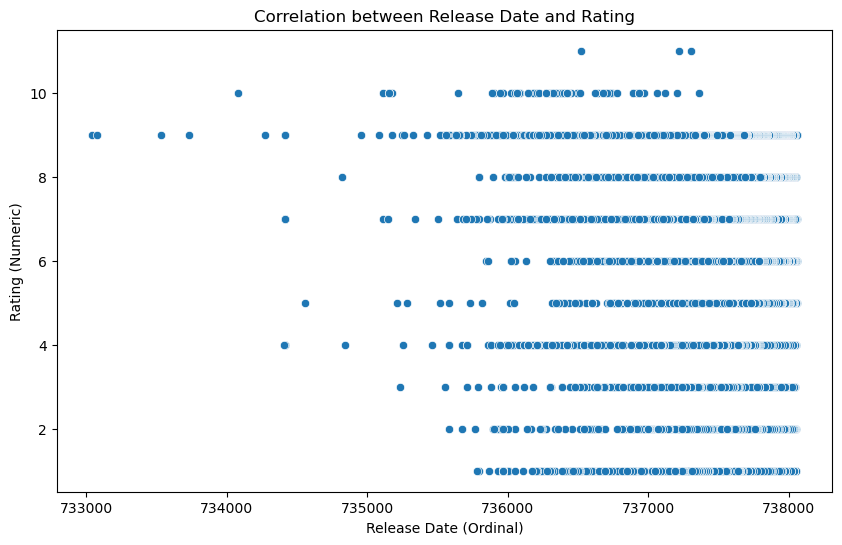

In [22]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='date_added_ordinal', y='rating_numeric')
plt.title('Correlation between Release Date and Rating')
plt.xlabel('Release Date (Ordinal)')
plt.ylabel('Rating (Numeric)')
plt.show()

### The scatter plot visualization further supports this interpretation, as it demonstrates the absence of any discernible pattern or trend between the release date and the rating.


### Implications:

#### Viewer Preferences: 
Ratings might not significantly influence when content is added to the platform. Other factors, such as strategic release timing or content acquisition deals, could play a more significant role.

#### Content Variety: 
The lack of a strong correlation suggests that Netflix adds a variety of content, catering to different audiences without a specific pattern related to ratings.

#### Further Investigation:
While the overall correlation is weak, future research could explore specific genres or time periods to see if there are more detailed patterns.







#### Based on correlation analysis, it can be concluded that the timing of content addition does not appear to influence its rating on Netflix. Factors other than the release date likely play a more significant role in determining the assigned rating for Netflix content. This analysis provides valuable insights into the dynamics between content release dates and ratings on Netflix, contributing to a better understanding of the platform's viewer preferences and content strategies.








# SUMMARY 

This analysis offers a comprehensive view of Netflix's content library, revealing insights into content type distribution, geographic diversity, rating patterns, and genre popularity. The weak correlation between release date and rating suggests that content ratings are independent of when they were added to the platform. These findings can help understand Netflix’s content strategy and its evolution over time.






